(c) Juan Gomez 2019. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# Stress analysis with SolidsPy

**Note: To cover this notebook the user must have installed SolidsPy and the required modules as defined in the code's REPO. Similarly, files to conduct the example are available in the files folder of this REPO**

In **SolidsPy** a finite element model is represented in terms of text files defining the nodes, elements, loads and material properties. The complete description of the code, together with detailed tutorials and installation instructions is avaialable in the following [REPO.](https://github.com/AppliedMechanics-EAFIT/SolidsPy)

The first step, involving the creation of a model in **gmsh** is not covered in this notebook, however the following video presents a summary of these steps for a simple model. 

To facilite the subsequent interpretation of the different parts of the model in a finte element analysis **gmsh** allows the creation of groups of these **geometric objects** into **physical objects**. For instance, these **physical objects** are useful in the definition of loads over specific lines, on assignaning material properties to the different parts of the region and in the defintion of displacement boundary conditions along specific groups of nodes. The followong figure shows the **physical objects** for the current example.

Note that each such physical object is named by an integer number. In this case physical line **500** defines the top surface of the model where the uniform load is to be applied; physical line **300** corresponds to the lateral surfaces where the horizontal displacement component are resrained; physical line **400** is the bottom surface with restrained vertical displacements and finally physical surfaces **100** and **200** define respectively regions of the model whose material properties are either 1 or 2.

## Converting the gmsh model into SolidsPy text files.

Once the mesh is created the information of nodes, lines, elements and other geometric entities would be associated to the different physical objects facilitating its interpretation by external codes.

In **SolidsPy** a finite element model is described in terms of 4 text files, namely: **nodes.txt**, **eles.txt**, **loads.txt** and **mater.txt**. The creation of these files out of the **gmsh** model is schematized in the following figure.

**Note: The structure of the input files used by SolidsPy is described for a 4-elements simple [square](https://github.com/AppliedMechanics-EAFIT/SolidsPy/blob/master/docs/tutorials/square_example.rst) problem.**

To make this conversion from **gmsh** to **SolidsPy** the user needs to create a problem dependent script based on 4 subroutines available on the pre-processing module from **SolidsPy**. These subroutines interpret the **gmsh** model using the identifiers for the different **phyiscal objects**. The subroutines are summarized like:

* **node_writer()**: The function returns the numpy array **nodes_array[]** ready to be written into the file **nodes.txt** of **SolidsPy**.

* **boundary_conditions()**: Handles each physical line where displacement boundary conditions are imposed.

* **loading()**: The subroutine uses the load magnitudes  along the x and y direction defined by the parameters P_x and P_y and divides the resultant force by the number of nodes pertaining to the **physical line**.

* **ele_writer()**: It is used to write the text file with the element data. The subroutine must be used as many times as physical surfaces there are in the model in order to assign different material properties or different element types.

In [1]:
import sys
import os
# Construct the full path to the source code directory relative to the current working directory
source_code_path = os.path.join(os.getcwd(), "..", "solidspy")
# Add the source code directory to the Python path
sys.path.append(source_code_path)

In [2]:
%matplotlib inline        
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import assemutil as ass
import postprocesor as pos
import solutil as sol

**readin()** is also avaialble within **SolidsPy** but here we have added a modified version to upload the input files from the **files** folder in this REPO. The specific files to be read are **Mnodes.txt**, **Meles.txt**, **Mloads.txt** and **Mmater.txt**

In [3]:
def readin():
    nodes    = np.loadtxt('files/' + 'Honodes.txt', ndmin=2)
    mats     = np.loadtxt('files/' + 'Homater.txt', ndmin=2)
    elements = np.loadtxt('files/' + 'Hoeles.txt', ndmin=2, dtype=int)
    loads    = np.loadtxt('files/' + 'Holoads.txt', ndmin=2)

    return nodes, mats, elements, loads

### Meshing script

In the following block of code we write the meshing script for the bi-material plate example. A graphical description of the script is also given in the figure. The script uses the **gmsh** model given by the file **template.msh** available in the **files** folder of the REPO and writes the text files **Mnodes.txt**, **Meles.txt** and **Mloads.txt** to that same folder.

**Question:**

**Using the figure below, which shows a graphical description of the meshing script used to generate the text files corresponding to the bi-material plate model add comments to each one of the relevant commands in the script.**

## Executing the analysis

Once the input files are written in the **files** folder the analaysis can be executed. Here we do this following a step-by-step process where we compute the assembly operator, use it to assemble the global system of equations and solve the system to complete the solution. Alternatively the analysis can also be performed using a single call to the execution subroutine as descripbed in the [REPO.](https://github.com/AppliedMechanics-EAFIT/SolidsPy)

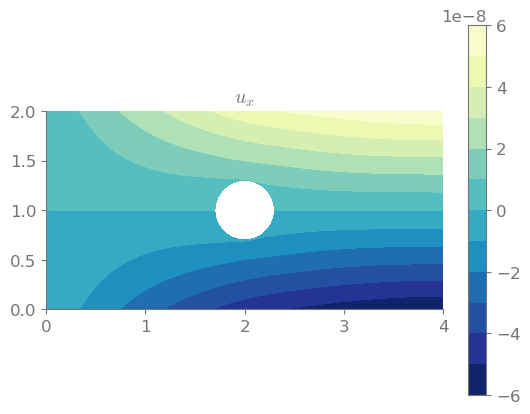

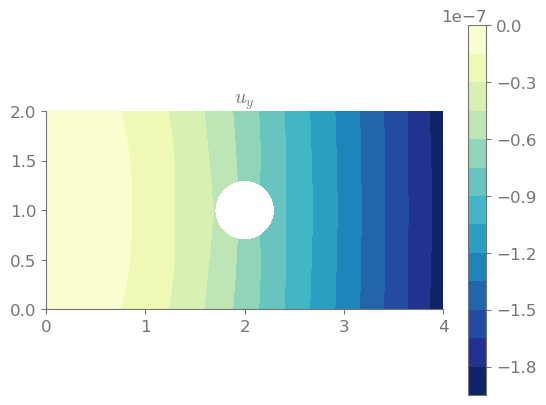

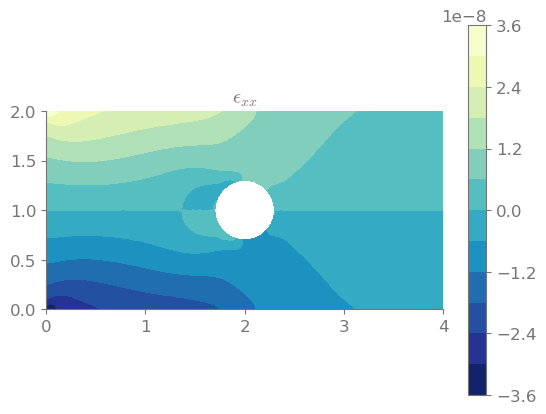

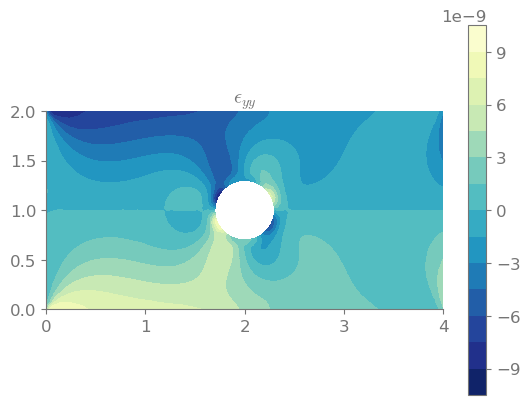

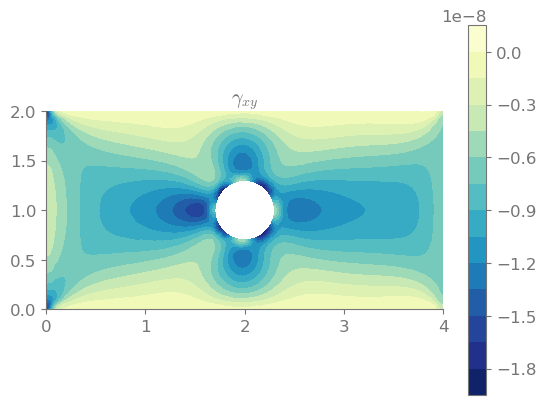

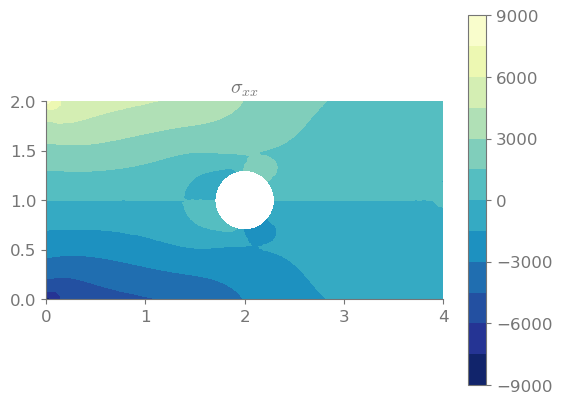

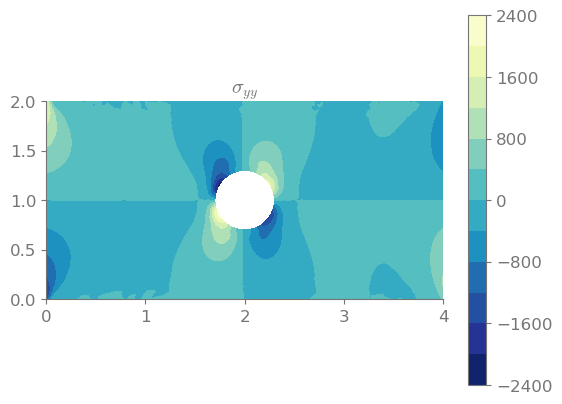

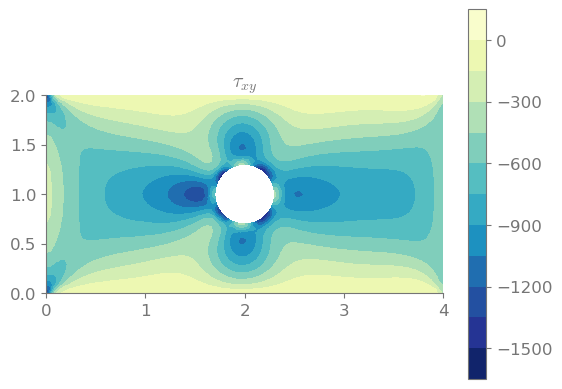

In [4]:
nodes, mats, elements, loads = readin()
DME , IBC , neq = ass.DME(nodes, elements)
KG = ass.assembler(elements, mats, nodes, neq, DME)
RHSG = ass.loadasem(loads, IBC, neq)
UG = sol.static_sol(KG, RHSG)
UC = pos.complete_disp(IBC, nodes, UG)
E_nodes, S_nodes = pos.strain_nodes(nodes , elements, mats, UC)
pos.fields_plot(elements, nodes, UC, E_nodes=E_nodes, S_nodes=S_nodes)